Prediction of patients with possible diabetes using the following models: Random Forest, Support Vector Machines, Gaussian Process Regression

obtener csv

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzalomajlis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets


100%|██████████| 62.3k/62.3k [00:00<00:00, 38.6MB/s]

In [ ]:
import pandas as pd
file = pd.read_csv("/content/diabetes-prediction-datasets/diabetes_data.csv")
file.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


In [ ]:
#file.drop(['user_id', 'date'], axis=1, inplace=True)
#file.head()
file.shape

(1000, 13)

In [ ]:
from sklearn.model_selection import train_test_split

file_x = file.drop(['risk_score', 'user_id', 'date'], axis=1).copy()
file_y = file['risk_score'].copy()

X, x_test, y, y_test = train_test_split(file_x, file_y, train_size=0.95 ,test_size=0.05, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.8 ,test_size=0.2, random_state=0)
x_test.head()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi
993,59.770236,177.083038,131.511641,45.021989,1,1,0,7.069007,0,19.1
859,79.493977,172.603218,147.764305,26.092193,0,0,0,5.565259,1,26.7
298,82.192932,172.673923,166.018004,6.932990,0,1,0,8.478692,0,27.6
553,73.816313,161.731196,155.584567,80.231131,1,0,2,8.266932,1,28.2
672,64.859686,166.082419,150.417691,7.139614,0,1,0,6.566697,1,23.5


forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators=100 , random_state=0)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_val)
mae = mean_absolute_error(y_val, preds)
print(mae)

3.7493059544789276


3.3122746558902003


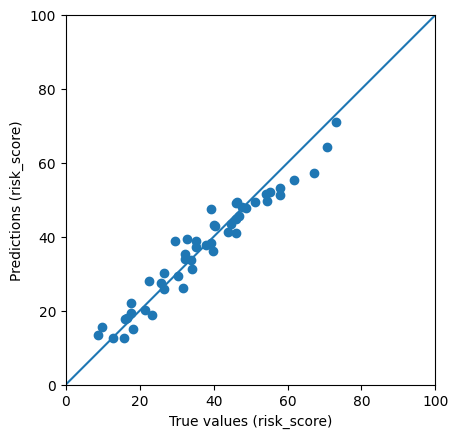

In [ ]:
import matplotlib.pyplot as plt

test_predictions = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (risk_score)')
plt.ylabel('Predictions (risk_score)')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


Support vector machines (VMS)

In [ ]:
from sklearn import svm
svr_model = svm.SVR(C=1000)
svr_model.fit(x_train, y_train)

valid_predict_svr = svr_model.predict(x_val)
mae = mean_absolute_error(y_val, valid_predict_svr)
print(mae)

6.590289652411081


6.922337696173632


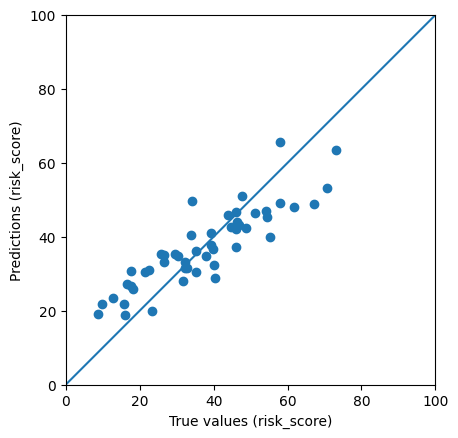

In [ ]:
test_predictions_svr = svr_model.predict(x_test)
mae = mean_absolute_error(y_test, test_predictions_svr)
print(mae)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions_svr)
plt.xlabel('True values (risk_score)')
plt.ylabel('Predictions (risk_score)')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

Gaussian process regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Definir el kernel
kernel = C(1.0, (1e-4, 1e4)) * RBF([1.0], (1e-3, 1e3))

# Crear el modelo de Proceso Gaussiano
gpr = GaussianProcessRegressor( kernel,
                                n_restarts_optimizer=10,
                                alpha=0.1)

# Entrenar el modelo
gpr.fit(x_train, y_train)


GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [ ]:
valid_predict_gpr = gpr.predict(x_val)
mae = mean_absolute_error(y_val, valid_predict_gpr)
print(mae)

8.851234809042051


8.456187164731945


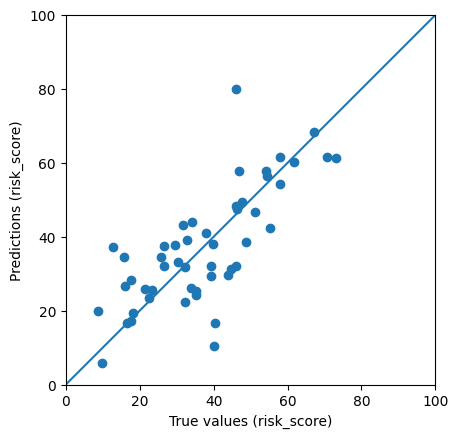

In [ ]:
test_predictions_gpr = gpr.predict(x_test)
mae = mean_absolute_error(y_test, test_predictions_gpr)
print(mae)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions_gpr)
plt.xlabel('True values (risk_score)')
plt.ylabel('Predictions (risk_score)')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)